# EDA Notebook

In [1]:
import pandas as pd
import numpy as np
import retriving_reviews
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.misc import imread
%matplotlib inline

### Importing as the Yelp DataSets

In [2]:
data_reviews = retriving_reviews.load_pickle('/Users/gmgtex/Desktop/Galvanize/Immersive/capstone/pkl_data/yelp_reviews.pkl')
data_business = retriving_reviews.load_pickle('/Users/gmgtex/Desktop/Galvanize/Immersive/capstone/pkl_data/yelp_business.pkl')
# data_tips = retriving_reviews.load_pickle('/Users/gmgtex/Desktop/Galvanize/Immersive/capstone/pkl_data/yelp_tips.pkl')
# data_user = retriving_reviews.load_pickle('/Users/gmgtex/Desktop/Galvanize/Immersive/capstone/pkl_data/yelp_user.pkl')
#data_photos = retriving_reviews.load_pickle('/Users/gmgtex/Desktop/Galvanize/Immersive/capstone/pkl_data/yelp_photos.pkl')
# data_checkin = retriving_reviews.load_pickle('/Users/gmgtex/Desktop/Galvanize/Immersive/capstone/pkl_data/yelp_checkin.pkl')

## REVIEW DATASET

In [3]:
print(data_reviews.describe())
print(data_reviews.info())
data_reviews.head()

               cool         funny         stars        useful
count  4.736897e+06  4.736897e+06  4.736897e+06  4.736897e+06
mean   5.096600e-01  4.029171e-01  3.724048e+00  9.882921e-01
std    1.960374e+00  1.721954e+00  1.421104e+00  2.600021e+00
min    0.000000e+00  0.000000e+00  1.000000e+00  0.000000e+00
25%    0.000000e+00  0.000000e+00  3.000000e+00  0.000000e+00
50%    0.000000e+00  0.000000e+00  4.000000e+00  0.000000e+00
75%    0.000000e+00  0.000000e+00  5.000000e+00  1.000000e+00
max    5.130000e+02  6.310000e+02  5.000000e+00  1.125000e+03
<class 'pandas.core.frame.DataFrame'>
Int64Index: 4736897 entries, 0 to 4736896
Data columns (total 9 columns):
business_id    object
cool           int64
date           datetime64[ns]
funny          int64
review_id      object
stars          int64
text           object
useful         int64
user_id        object
dtypes: datetime64[ns](1), int64(4), object(4)
memory usage: 361.4+ MB
None


,business_id,cool,date,funny,review_id,stars,text,useful,user_id
0,uYHaNptLzDLoV_JZ_MuzUA,0,2016-07-12,0,VfBHSwC5Vz_pbFluy07i9Q,5,My girlfriend and I stayed here for 3 nights a...,0,cjpdDjZyprfyDG3RlkVG3w
1,uYHaNptLzDLoV_JZ_MuzUA,0,2016-10-02,0,3zRpneRKDsOPq92tq7ybAA,3,If you need an inexpensive place to stay for a...,0,bjTcT8Ty4cJZhEOEo01FGA
2,uYHaNptLzDLoV_JZ_MuzUA,0,2015-09-17,0,ne5WhI1jUFOcRn-b-gAzHA,3,Mittlerweile gibt es in Edinburgh zwei Ableger...,0,AXgRULmWcME7J6Ix3I--ww
3,uYHaNptLzDLoV_JZ_MuzUA,0,2016-08-21,0,llmdwOgDReucVoWEry61Lw,4,Location is everything and this hotel has it! ...,0,oU2SSOmsp_A8JYI7Z2JJ5w
4,uYHaNptLzDLoV_JZ_MuzUA,0,2013-11-20,0,DuffS87NaSMDmIfluvT83g,5,gute lage im stadtzentrum. shoppingmeile und s...,0,0xtbPEna2Kei11vsU-U2Mw


In [4]:
text = data_reviews.text #these are the reviews that I will be processing
text.head()

0    My girlfriend and I stayed here for 3 nights a...
1    If you need an inexpensive place to stay for a...
2    Mittlerweile gibt es in Edinburgh zwei Ableger...
3    Location is everything and this hotel has it! ...
4    gute lage im stadtzentrum. shoppingmeile und s...
Name: text, dtype: object

In [5]:
data_reviews.text.iloc[2] #some reviews not in english

"Mittlerweile gibt es in Edinburgh zwei Ableger der Motel-One-Kette - diese hier ist eher das schlechtere.\n\nWir hatten auf unserer Schottlandtour die Gelegenheit beide Ableger kennenzulernen, da wir beide Nächte in Edinburgh (am ersten sowie am letzten Tag) in einem der beiden Motel One's verbrachten. Von diesem hier waren wir nach dem überraschend positiven Erlebnis im Motel One an der Princes Street [1] etwas enttäuscht.\n\nDas Hotel ist wesentlich größer und extrem unübersichtlich. Da man auf der fünften Etage noch Teile eines weiteren Gebäude, das mittels einer Glasbrücke mit dem Hauptgebäude verbunden ist, hinzugenommen hat, kann die Suche nach dem Zimmer insbesondere auf dieser Etage zu einem Gang im Labyrinth ausarten. Habe ich so noch in keinem Hotel erlebt - uns begegneten immer wieder Menschen, die sich auf der Suche nach ihren Zimmern verirrt haben.\nUnser Zimmer war ähnlich aufgebaut wie das Zimmer im Motel One Princes Street - befand sich jedoch im Inneren des Gebäudes u

In [6]:
data_reviews['sentiment'] = data_reviews['stars'].apply(lambda x: 'negative'if x <3 else ('neutral' if x==3 else 'positive'))
print(data_reviews['text'][(data_reviews['sentiment'] == 'negative')].head())
data_reviews.head()

16    This place is horrible, we were so excited to ...
21    Decent customer service but the food was awful...
24    The staff here is great and they're nice,  won...
25    I had the garlic ginger broccoli chicken and i...
29    Definitely not a fan. Coming from Orange Count...
Name: text, dtype: object


,business_id,cool,date,funny,review_id,stars,text,useful,user_id,sentiment
0,uYHaNptLzDLoV_JZ_MuzUA,0,2016-07-12,0,VfBHSwC5Vz_pbFluy07i9Q,5,My girlfriend and I stayed here for 3 nights a...,0,cjpdDjZyprfyDG3RlkVG3w,positive
1,uYHaNptLzDLoV_JZ_MuzUA,0,2016-10-02,0,3zRpneRKDsOPq92tq7ybAA,3,If you need an inexpensive place to stay for a...,0,bjTcT8Ty4cJZhEOEo01FGA,neutral
2,uYHaNptLzDLoV_JZ_MuzUA,0,2015-09-17,0,ne5WhI1jUFOcRn-b-gAzHA,3,Mittlerweile gibt es in Edinburgh zwei Ableger...,0,AXgRULmWcME7J6Ix3I--ww,neutral
3,uYHaNptLzDLoV_JZ_MuzUA,0,2016-08-21,0,llmdwOgDReucVoWEry61Lw,4,Location is everything and this hotel has it! ...,0,oU2SSOmsp_A8JYI7Z2JJ5w,positive
4,uYHaNptLzDLoV_JZ_MuzUA,0,2013-11-20,0,DuffS87NaSMDmIfluvT83g,5,gute lage im stadtzentrum. shoppingmeile und s...,0,0xtbPEna2Kei11vsU-U2Mw,positive


In [7]:
data_reviews.sentiment.value_counts()

positive    3123833
negative    1042245
neutral      570819
Name: sentiment, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x15d6ea278>]], dtype=object)

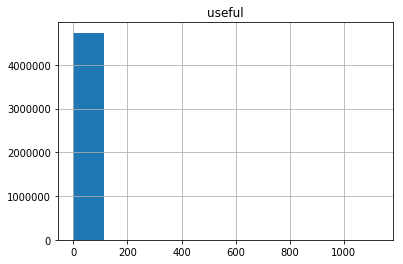

In [8]:
pd.DataFrame.hist(data=data_reviews, column='useful', bins=10)

In [9]:
data_reviews['usefulness'] = data_reviews['useful'].apply(lambda x: 'very_useful'if x >=5 else ('useful' if  x>0 else 'not_useful'))
data_reviews.head()

,business_id,cool,date,funny,review_id,stars,text,useful,user_id,sentiment,usefulness
0,uYHaNptLzDLoV_JZ_MuzUA,0,2016-07-12,0,VfBHSwC5Vz_pbFluy07i9Q,5,My girlfriend and I stayed here for 3 nights a...,0,cjpdDjZyprfyDG3RlkVG3w,positive,not_useful
1,uYHaNptLzDLoV_JZ_MuzUA,0,2016-10-02,0,3zRpneRKDsOPq92tq7ybAA,3,If you need an inexpensive place to stay for a...,0,bjTcT8Ty4cJZhEOEo01FGA,neutral,not_useful
2,uYHaNptLzDLoV_JZ_MuzUA,0,2015-09-17,0,ne5WhI1jUFOcRn-b-gAzHA,3,Mittlerweile gibt es in Edinburgh zwei Ableger...,0,AXgRULmWcME7J6Ix3I--ww,neutral,not_useful
3,uYHaNptLzDLoV_JZ_MuzUA,0,2016-08-21,0,llmdwOgDReucVoWEry61Lw,4,Location is everything and this hotel has it! ...,0,oU2SSOmsp_A8JYI7Z2JJ5w,positive,not_useful
4,uYHaNptLzDLoV_JZ_MuzUA,0,2013-11-20,0,DuffS87NaSMDmIfluvT83g,5,gute lage im stadtzentrum. shoppingmeile und s...,0,0xtbPEna2Kei11vsU-U2Mw,positive,not_useful


In [10]:
data_reviews['usefulness'].value_counts()

not_useful     2754907
useful         1784406
very_useful     197584
Name: usefulness, dtype: int64

In [11]:
print(data_reviews['stars'].value_counts())
data_reviews['stars'].mean() # mean review rating

5    1988003
4    1135830
1     639849
3     570819
2     402396
Name: stars, dtype: int64


3.724048253529684

## BUSINESS DATASET

In [12]:
print(data_business.describe())
print(data_business.info())
data_business.head()

             is_open       latitude      longitude   review_count  \
count  156639.000000  156638.000000  156638.000000  156639.000000   
mean        0.844375      38.585033     -92.856485      30.238159   
std         0.362501       5.399871      26.557741      96.486631   
min         0.000000     -36.086009    -142.466650       3.000000   
25%         1.000000      33.627161    -112.138207       4.000000   
50%         1.000000      36.142381     -89.523198       9.000000   
75%         1.000000      43.596845     -79.668760      23.000000   
max         1.000000      89.999314     115.086769    6979.000000   

               stars  
count  156639.000000  
mean        3.647154  
std         0.977640  
min         1.000000  
25%         3.000000  
50%         3.500000  
75%         4.500000  
max         5.000000  
<class 'pandas.core.frame.DataFrame'>
Int64Index: 156639 entries, 0 to 156638
Data columns (total 15 columns):
address         156639 non-null object
attributes      15663

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,neighborhood,postal_code,review_count,stars,state
0,691 Richmond Rd,"{'RestaurantsPriceRange2': 2, 'BusinessParking...",YDf95gJZaq05wvo7hTQbbQ,"[Shopping, Shopping Centers]",Richmond Heights,"{'Monday': '10:00-21:00', 'Tuesday': '10:00-21...",1,41.541716,-81.493116,Richmond Town Square,,44143,17,2.0,OH
1,2824 Milton Rd,"{'GoodForMeal': {'dessert': False, 'latenight'...",mLwM-h2YhXl2NCgdS84_Bw,"[Food, Soul Food, Convenience Stores, Restaura...",Charlotte,"{'Monday': '10:00-22:00', 'Tuesday': '10:00-22...",0,35.236870,-80.741976,South Florida Style Chicken & Ribs,Eastland,28215,4,4.5,NC
2,337 Danforth Avenue,"{'BusinessParking': {'garage': False, 'street'...",v2WhjAB3PIBA8J8VxG3wEg,"[Food, Coffee & Tea]",Toronto,"{'Monday': '10:00-19:00', 'Tuesday': '10:00-19...",0,43.677126,-79.353285,The Tea Emporium,Riverdale,M4K 1N7,7,4.5,ON
3,"7702 E Doubletree Ranch Rd, Ste 300",{},CVtCbSB1zUcUWg-9TNGTuQ,"[Professional Services, Matchmakers]",Scottsdale,"{'Tuesday': '9:00-17:00', 'Friday': '9:00-17:0...",1,33.565082,-111.916400,TRUmatch,,85258,3,3.0,AZ
4,4719 N 20Th St,"{'GoodForMeal': {'dessert': False, 'latenight'...",duHFBe87uNSXImQmvBh87Q,"[Sandwiches, Restaurants]",Phoenix,{},0,33.505928,-112.038847,Blimpie,,85016,10,4.5,AZ


### Important summary stats
#### Business Rating
* mean rating=3.647154
* std=0.977640
* min rating=1
* max rating=5
    * 25%=3.0
    * 50%=3.5
    * 75%=4.5
        * break up sentiment anaylsis --> below 50% negative, above 50% positive

#### Number of Reviews per Business
* mean rating=30.238159
* std=96.486631   
* min=3.000000 
* max=6979.000000
    * 25%=4.000000   
    * 50%=9.000000   
    * 75%=23.000000  

In [4]:
data_business.city.value_counts() #unique locations and counts
data_business.city.count()

156639

In [5]:
data_business['stars'].unique()

array([ 2. ,  4.5,  3. ,  5. ,  2.5,  3.5,  4. ,  1.5,  1. ])

In [6]:
data_business.attributes.iloc[4]

{'Alcohol': 'none',
 'Ambience': {'casual': False,
  'classy': False,
  'divey': False,
  'hipster': False,
  'intimate': False,
  'romantic': False,
  'touristy': False,
  'trendy': False,
  'upscale': False},
 'BikeParking': True,
 'BusinessAcceptsCreditCards': True,
 'BusinessParking': {'garage': False,
  'lot': False,
  'street': False,
  'valet': False,
  'validated': False},
 'Caters': True,
 'GoodForKids': True,
 'GoodForMeal': {'breakfast': False,
  'brunch': False,
  'dessert': False,
  'dinner': False,
  'latenight': False,
  'lunch': False},
 'HasTV': False,
 'NoiseLevel': 'quiet',
 'OutdoorSeating': False,
 'RestaurantsAttire': 'casual',
 'RestaurantsDelivery': False,
 'RestaurantsGoodForGroups': True,
 'RestaurantsPriceRange2': 1,
 'RestaurantsReservations': False,
 'RestaurantsTableService': False,
 'RestaurantsTakeOut': True,
 'WiFi': 'no'}

## Getting Only Restaurants

In [3]:
cats = data_business.categories
print(cats.shape)
cats.head(10)

(156639,)


0                         [Shopping, Shopping Centers]
1    [Food, Soul Food, Convenience Stores, Restaura...
2                                 [Food, Coffee & Tea]
3                 [Professional Services, Matchmakers]
4                            [Sandwiches, Restaurants]
5                            [Shopping, Tobacco Shops]
6                    [Chiropractors, Health & Medical]
7    [Automotive, Oil Change Stations, Car Wash, Au...
8    [Jewelry Repair, Gold Buyers, Local Services, ...
9                     [Health & Medical, Optometrists]
Name: categories, dtype: object

Need to figure out which key terms to split by in categories possibly Restaurants

In [4]:
scategories=[cat for cat in cats]
keywords = ['Restaurants']
ind = set(ind for ind, cat in enumerate(scategories) for word in cat if word in keywords)
len(ind)

51613

In [5]:
restaurant_ids = data_business['business_id'].iloc[list(ind)]
print(len(restaurant_ids))
restaurant_ids.head()

51613


131072    23gakZ_NlN3K0SqOBybwug
1         mLwM-h2YhXl2NCgdS84_Bw
4         duHFBe87uNSXImQmvBh87Q
131078    _JA3TLF5JJ95mthVwEdFuw
131083    86xm0Q8iX5ZjODWMkvwnxA
Name: business_id, dtype: object

There are 51,613 Business with the category Restaurant

In [6]:
data_rest = data_business[(data_business['business_id'].isin(restaurant_ids))]
data_rest.head()

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,neighborhood,postal_code,review_count,stars,state
1,2824 Milton Rd,"{'GoodForMeal': {'dessert': False, 'latenight'...",mLwM-h2YhXl2NCgdS84_Bw,"[Food, Soul Food, Convenience Stores, Restaura...",Charlotte,"{'Monday': '10:00-22:00', 'Tuesday': '10:00-22...",0,35.236870,-80.741976,South Florida Style Chicken & Ribs,Eastland,28215,4,4.5,NC
4,4719 N 20Th St,"{'GoodForMeal': {'dessert': False, 'latenight'...",duHFBe87uNSXImQmvBh87Q,"[Sandwiches, Restaurants]",Phoenix,{},0,33.505928,-112.038847,Blimpie,,85016,10,4.5,AZ
14,9616 E Independence Blvd,"{'Alcohol': 'full_bar', 'HasTV': True, 'NoiseL...",SDMRxmcKPNt1AHPBKqO64Q,"[Burgers, Bars, Restaurants, Sports Bars, Nigh...",Matthews,"{'Monday': '11:00-0:00', 'Tuesday': '11:00-0:0...",1,35.135196,-80.714683,Applebee's,,28105,21,2.0,NC
15,190 E Dallas Rd,"{'RestaurantsAttire': 'casual', 'Alcohol': 'no...",iFEiMJoEqyB9O8OUNSdLzA,"[Chinese, Restaurants]",Stanley,"{'Monday': '11:30-22:00', 'Tuesday': '11:30-22...",1,35.355085,-81.087268,China Garden,,28164,3,3.0,NC
21,4759 Liberty Ave,"{'GoodForMeal': {'dessert': False, 'latenight'...",HmI9nhgOkrXlUr6KZGZZew,"[Sandwiches, Restaurants, Italian, Diners, Bre...",Pittsburgh,"{'Sunday': '8:00-12:00', 'Tuesday': '8:00-12:0...",1,40.461350,-79.948113,Rocky's,Bloomfield,15224,15,3.0,PA


In [ ]:
attributes = data_rest['attributes']
print(attributes.head())

In [ ]:
for a in data_rest['attributes']:
    if 'RestaurantsPriceRange2' in a:
        data_rest['price'] = (a['RestaurantsPriceRange2'])
    else:
        data_rest['price'] = 0
data_rest.head()

In [ ]:
rest_att = pd.DataFrame(attributes)
rest_att.head()

## Restaurant_Review DataFrame

In [7]:
restaurant_review_df = data_reviews[data_reviews['business_id'].isin(restaurant_ids)]
print(restaurant_review_df.describe())
print(restaurant_review_df.info())
restaurant_review_df.head()

               cool         funny         stars        useful
count  2.927731e+06  2.927731e+06  2.927731e+06  2.927731e+06
mean   5.071750e-01  3.901687e-01  3.702161e+00  9.096423e-01
std    1.963844e+00  1.738919e+00  1.343467e+00  2.649526e+00
min    0.000000e+00  0.000000e+00  1.000000e+00  0.000000e+00
25%    0.000000e+00  0.000000e+00  3.000000e+00  0.000000e+00
50%    0.000000e+00  0.000000e+00  4.000000e+00  0.000000e+00
75%    0.000000e+00  0.000000e+00  5.000000e+00  1.000000e+00
max    5.130000e+02  6.310000e+02  5.000000e+00  1.125000e+03
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2927731 entries, 16 to 4736896
Data columns (total 9 columns):
business_id    object
cool           int64
date           datetime64[ns]
funny          int64
review_id      object
stars          int64
text           object
useful         int64
user_id        object
dtypes: datetime64[ns](1), int64(4), object(4)
memory usage: 223.4+ MB
None


,business_id,cool,date,funny,review_id,stars,text,useful,user_id
16,jQsNFOzDpxPmOurSWCg1vQ,0,2017-06-03,0,ByRzJ8rF2KJWLr-cUNU6EA,1,"This place is horrible, we were so excited to ...",0,kzyLOqiJvyw_FWFTw2rjiQ
17,jQsNFOzDpxPmOurSWCg1vQ,0,2015-03-26,0,i5UwUPlQFPLcE8p2gPFwBw,4,"For being fairly ""fast"" food.. Pei Wei (pronou...",1,WZXp9-V2dqRRJqhGgRqueA
18,jQsNFOzDpxPmOurSWCg1vQ,1,2012-12-30,1,EyQyvTTg2jX4or9bB8PC9g,5,"I decided to try it out, I'm celiac and theref...",2,XylT12exfdLiI_3uDLVIpw
19,jQsNFOzDpxPmOurSWCg1vQ,1,2009-01-12,1,G-EFA005besj5uHsH0sQFA,3,I'm not saying Pei Wei is the best asian food ...,1,Ji9PeffxjwqPLO7pEfSpKQ
20,jQsNFOzDpxPmOurSWCg1vQ,0,2015-07-11,0,6PcJSGUBSLjt4VLXos5C4A,3,Sometimes the food is spot on and delicious an...,0,TLIWzAJPrET0zX4_vgvLhg


#### Getting reviews and labels

In [8]:
text, review_rating = [], []
for i in range(restaurant_review_df.shape[0]):
    text.append(restaurant_review_df['text'].iloc[i])
    review_rating.append(restaurant_review_df['stars'].iloc[i])
print(len(text), len(review_rating))
text[1], review_rating[1]

2927731 2927731


('For being fairly "fast" food.. Pei Wei (pronounced pay way I confirmed haha) is pretty darn good. we got a few things to share. I had the Asian chicken salad and was impressed! There was a decent amount of chicken. Some more veggies would be nice, but overall pretty good. The steak teriyaki was great as well as the fried rice. Over all good was good! Nice, clean, and reasonable.',
 4)

2,927,731 reviews of 51,613 Restaurants! Wow thats a lot!!!

[1 4 5 3 2]


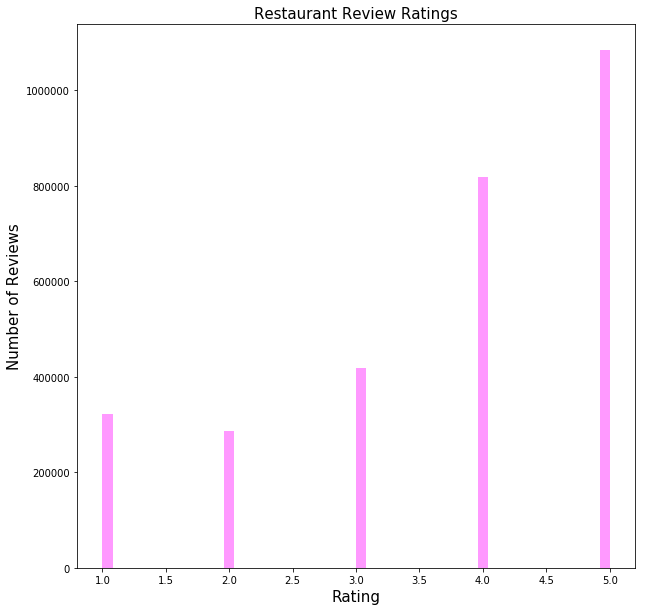

In [9]:
print(restaurant_review_df['stars'].unique())
fig4 = plt.figure(figsize=(10,10))
ax5 = fig4.add_subplot(111)
sns.distplot(restaurant_review_df['stars'], hist=True, kde=False, ax=ax5, color='magenta')
plt.xlabel('Rating', fontsize=15)
plt.ylabel('Number of Reviews', fontsize=15)
plt.title('Restaurant Review Ratings', fontsize=15)
plt.show()

### Finding Top 50 most reviewed Restaurants

In [10]:
restaurant_business = data_business[(data_business['business_id'].isin(restaurant_ids))]
restaurant_business_most_reviewed = restaurant_business.sort_values('review_count', ascending=False)
restaurant_business_most_reviewed['business_id'].head()

103325    4JNXUYY8wbaaDmk3BPzlWw
125404    RESDUcs7fIiihp38-d6_6g
45588     K7lWdNUhCbcnEvI0NhGewg
114018    cYwJA2A6I12KNkm2rtXd5g
100916    DkYS3arLOhA8si5uUEmHOw
Name: business_id, dtype: object

### Resturant Review Rating

* mean rating=3.702
* std=1.34
* min rating=1
* max rating=5
    * 25%=3.0
    * 50%=4.0
    * 75%=5.0
 

In [11]:
top_50_rated = [restaurant_business_most_reviewed['business_id'].iloc[i] for i in range(50)]
print(top_50_rated)
rated_restaurant_reviews_50 = restaurant_review_df[(restaurant_review_df['business_id'].isin(top_50_rated))]
print(rated_restaurant_reviews_50.head())

['4JNXUYY8wbaaDmk3BPzlWw', 'RESDUcs7fIiihp38-d6_6g', 'K7lWdNUhCbcnEvI0NhGewg', 'cYwJA2A6I12KNkm2rtXd5g', 'DkYS3arLOhA8si5uUEmHOw', 'f4x1YBxkLrZg652xt2KR5g', 'eoHdUeQDNgQ6WYEnP2aiRw', '2weQS-RnoOBhb1KsHKyoSQ', 'KskYqH1Bi7Z_61pH6Om8pg', 'ujHiaprwCQ5ewziu0Vi9rw', 'iCQpiavjjPzJ5_3gPD5Ebg', 'rcaPajgKOJC2vo_l3xa42A', 'El4FC8jcawUVgw_0EIcbaQ', 'hihud--QRriCYZw1zZvW4g', 'g8OnV26ywJlZpezdBnOWUQ', '7sPNbCx7vGAaH7SbNPZ6oA', 'XZbuPXdyA0ZtTu3AzqtQhg', 'OETh78qcgDltvHULowwhJg', 'P7pxQFqr7yBKMMI2J51udw', 'XXW_OFaYQkkGOGniujZFHg', 'yfxDa8RFOvJPQh0rNtakHA', 'HhVmDybpU7L50Kb5A0jXTg', 'Cni2l-VKG_pdospJ6xliXQ', 'QJatAcxYgK1Zp9BRZMAx7g', 'NvKNe9DnQavC9GstglcBJQ', '3kdSl5mo9dWC4clrQjEDGg', 'YJ8ljUhLsz6CtT_2ORNFmg', 'RwMLuOkImBIqqYj4SSKSPg', 'fL-b760btOaGa85OJ9ut3w', 'UPIYuRaZvknINOd1w8kqRQ', 'G-5kEa6E6PD5fkBRuA7k9Q', 'ECOkEVUodMLUxvI0PMI4gQ', 'ZkGDCVKSdf8m76cnnalL-A', 'xkVMIk_Vqh17f48ZQ_6b0w', 'awI4hHMfa7H0Xf0-ChU5hg', 'pH0BLkL4cbxKzu471VZnuA', 'LNGBEEelQx4zbfWnlc66cw', 'pSQFynH1VxkfSmehRXlZWw', 'faPVqws-x-

business ids of 50 most rated restaurants

### Barplot of Distribution of Reviews

                        stars_1  stars_2  stars_3  stars_4  stars_5
business_id                                                        
LR0qF0FEVsCOhYWUOiH26A    232.0    361.0    428.0    509.0    304.0
ECOkEVUodMLUxvI0PMI4gQ    354.0    334.0    477.0    595.0    312.0
ZkGDCVKSdf8m76cnnalL-A    270.0    327.0    445.0    637.0    334.0
JpgVl3d20CMRNjf1DVnzGA    435.0    246.0    298.0    354.0    377.0
El4FC8jcawUVgw_0EIcbaQ    706.0    475.0    688.0    938.0    479.0


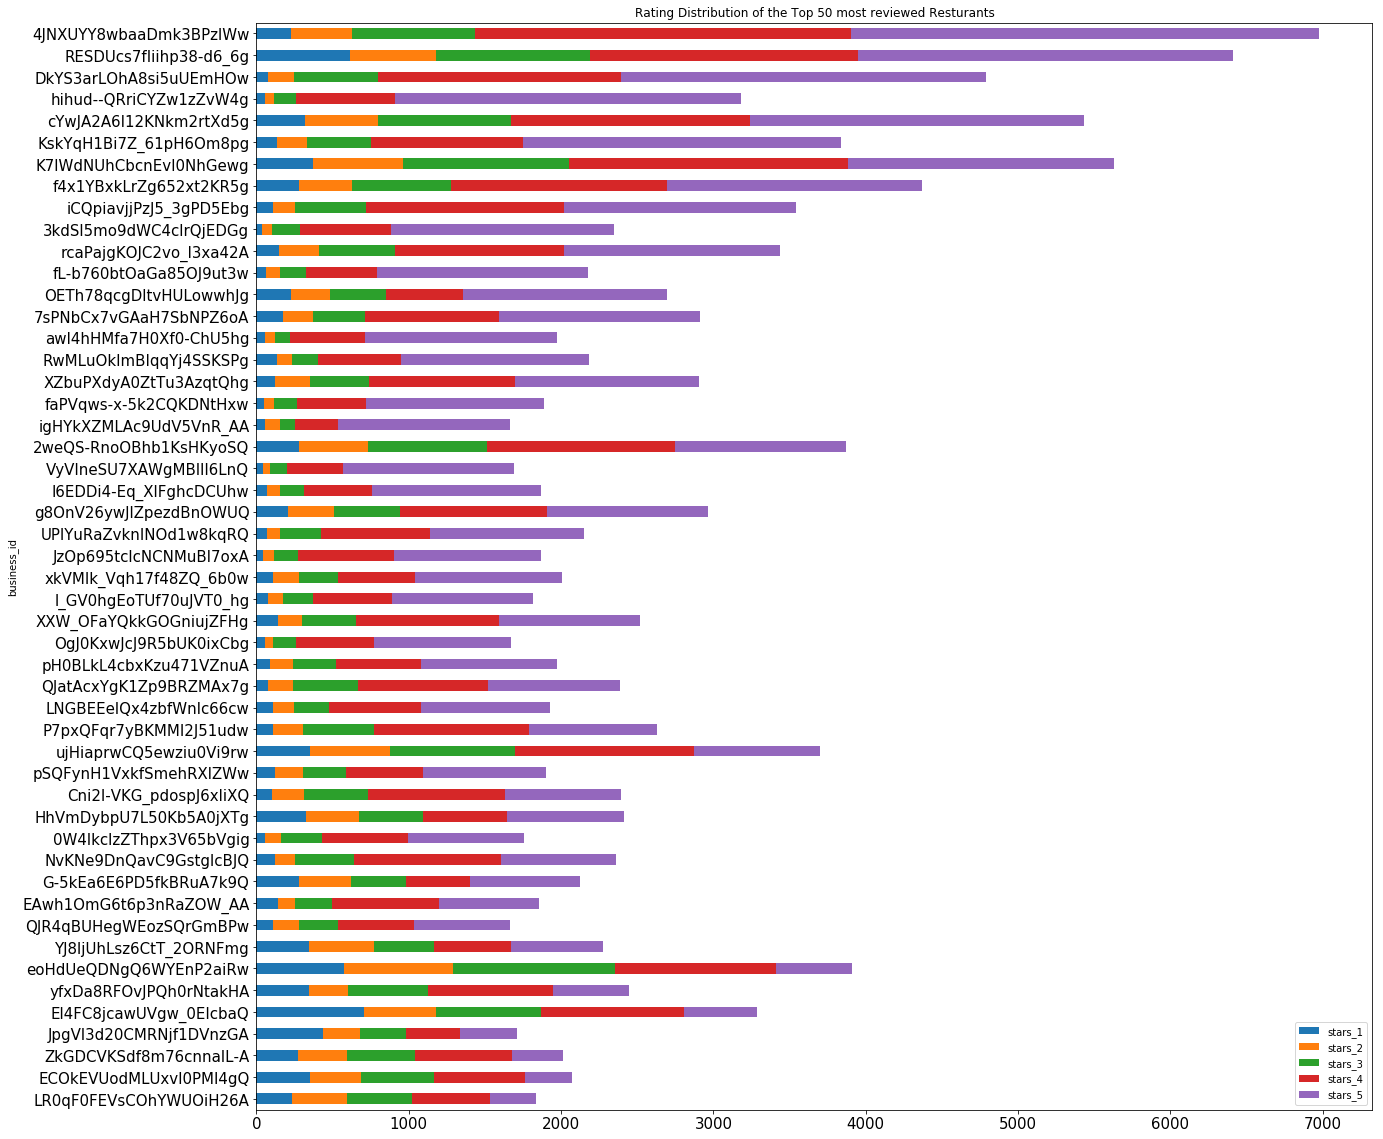

In [14]:
plt_reviews = rated_restaurant_reviews_50[['business_id','stars']]
dummies = pd.get_dummies(plt_reviews, columns=['stars'])
dummies = dummies.groupby('business_id').sum().sort_values(by='stars_5')
print(dummies.head())

ax = dummies.plot.barh(stacked=True, figsize=(20,20), title='Rating Distribution of the Top 50 most reviewed Resturants', fontsize=15)
fig = ax.get_figure()
fig.savefig('/Users/gmgtex/Desktop/nlp_yelp_reviews/50_most_rated.png')
plt.show()

### Restaurant Locations

/Users/gmgtex/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


                     address  \
1             2824 Milton Rd   
4             4719 N 20Th St   
14  9616 E Independence Blvd   
15           190 E Dallas Rd   
21          4759 Liberty Ave   

                                           attributes             business_id  \
1   {'GoodForMeal': {'dessert': False, 'latenight'...  mLwM-h2YhXl2NCgdS84_Bw   
4   {'GoodForMeal': {'dessert': False, 'latenight'...  duHFBe87uNSXImQmvBh87Q   
14  {'Alcohol': 'full_bar', 'HasTV': True, 'NoiseL...  SDMRxmcKPNt1AHPBKqO64Q   
15  {'RestaurantsAttire': 'casual', 'Alcohol': 'no...  iFEiMJoEqyB9O8OUNSdLzA   
21  {'GoodForMeal': {'dessert': False, 'latenight'...  HmI9nhgOkrXlUr6KZGZZew   

                                           categories        city  \
1   [Food, Soul Food, Convenience Stores, Restaura...   Charlotte   
4                           [Sandwiches, Restaurants]     Phoenix   
14  [Burgers, Bars, Restaurants, Sports Bars, Nigh...    Matthews   
15                             [Chinese, Res

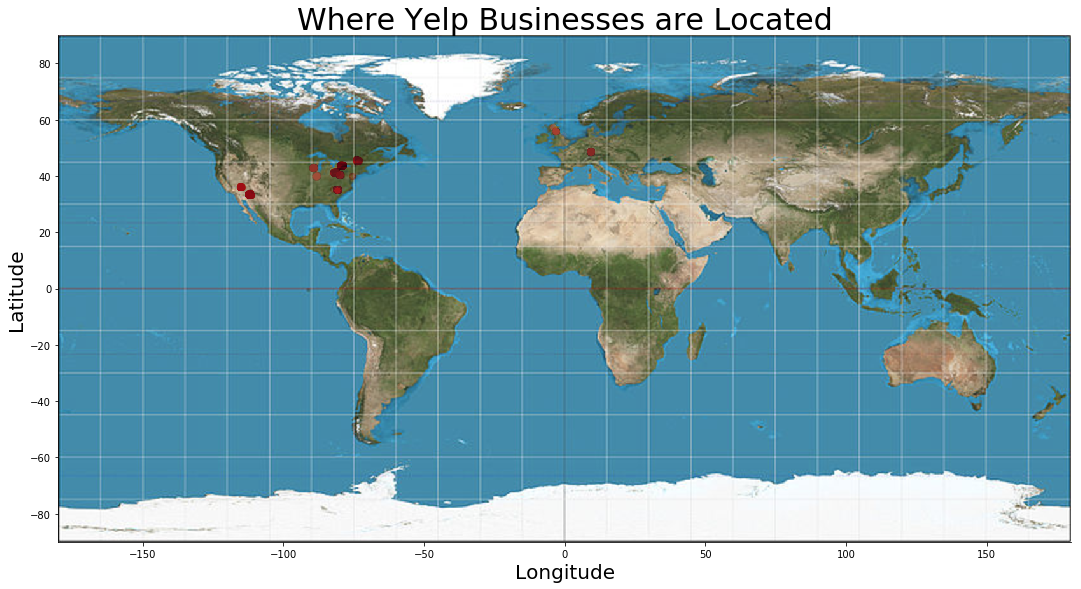

In [25]:
img = imread("/Users/gmgtex/Desktop/Map_Plots/World_map.png")
fig = plt.figure(figsize=(15,15))
restaurant_business['state_count'] = restaurant_business.groupby('state')['state'].transform(pd.Series.value_counts)
print(restaurant_business.head())
ax = sns.lmplot(x ='longitude',y = 'latitude', data = restaurant_business,hue='state_count', palette='Reds',\
                fit_reg = False, size=15, scatter_kws = {'alpha':.01}, legend=False)
plt.title("Where Yelp Businesses are Located",fontsize = 30)
plt.xlabel("Longitude",fontsize = 20)
plt.ylabel("Latitude",fontsize = 20)
plt.imshow(img,extent = [-180,180,-90,90])
plt.show()

Most restaurants in this dataset seem to be located in the United States

### Average Rating of Resturants

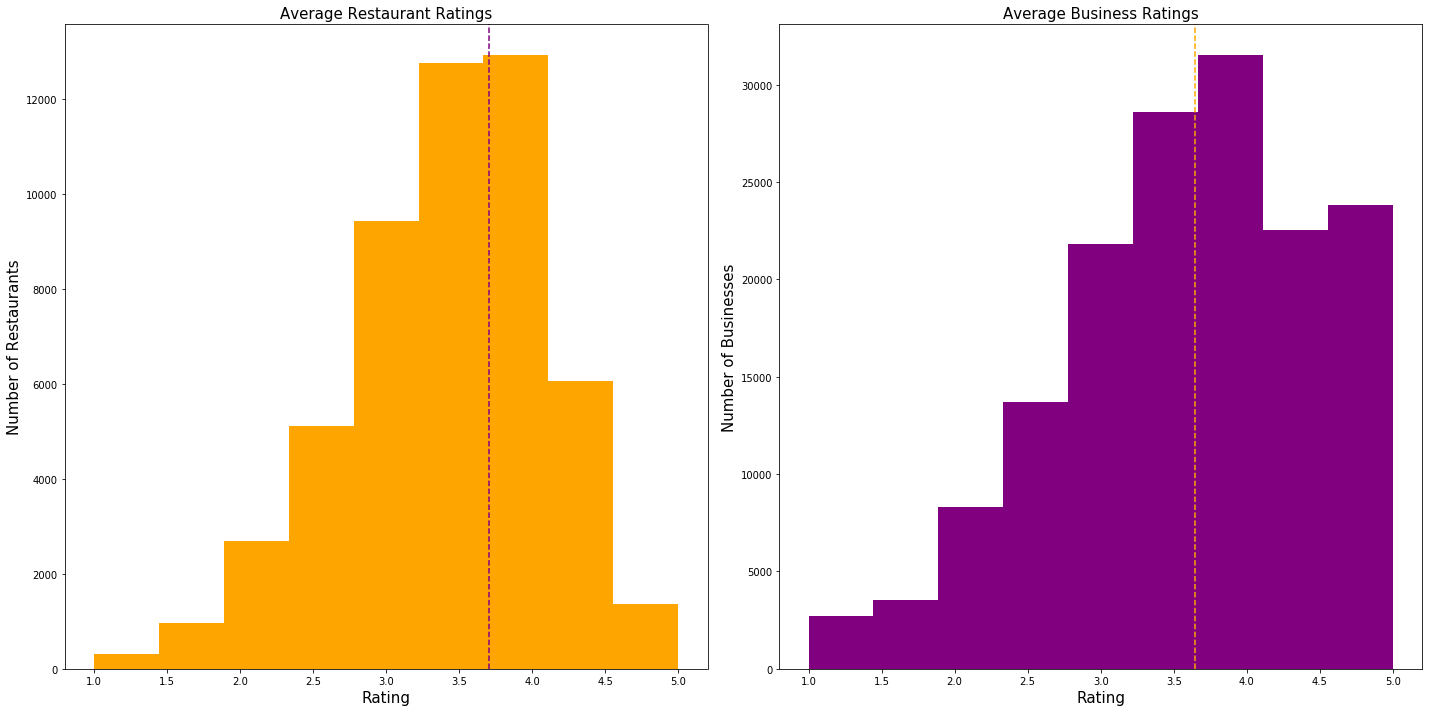

In [26]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax.hist(restaurant_business['stars'], bins=9, color='orange')
ax.set_xlabel('Rating', fontsize=15)
ax.set_ylabel('Number of Restaurants', fontsize=15)

ax.set_title('Average Restaurant Ratings', fontsize=15)
ax2.hist(data_business['stars'], bins=9, color='purple')
ax2.set_xlabel('Rating', fontsize=15)
ax2.set_ylabel('Number of Businesses', fontsize=15)
ax2.set_title('Average Business Ratings', fontsize=15)
ax.axvline(3.702, color='purple',linestyle='--')
ax2.axvline(3.647, color='orange', linestyle='--')
plt.tight_layout()
plt.show()

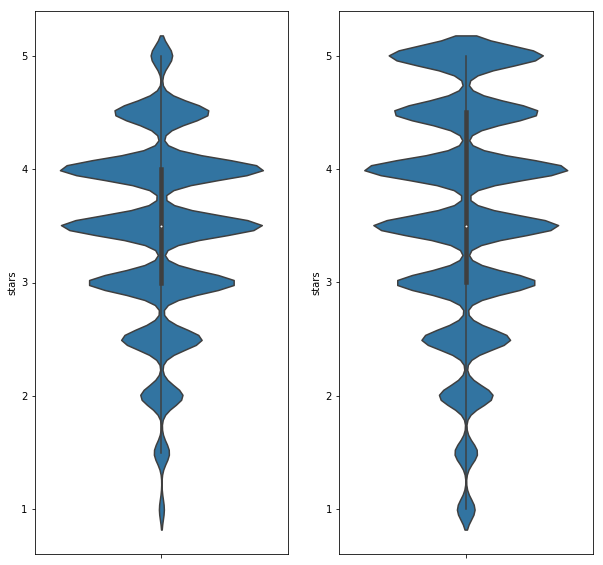

In [27]:
fig2 = plt.figure(figsize=(10,10))
ax3 = fig2.add_subplot(121)
ax4 = fig2.add_subplot(122)
sns.violinplot(y="stars", data=restaurant_business, ax=ax3, bins=9)
sns.violinplot(y='stars', data=data_business, ax=ax4, bins=9)

## TIPS DATASET

In [23]:
print(data_tips.describe())
print(data_tips.info())
data_tips.head()

              likes
count  1.028802e+06
mean   1.674472e-02
std    1.469311e-01
min    0.000000e+00
25%    0.000000e+00
50%    0.000000e+00
75%    0.000000e+00
max    1.500000e+01
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1028802 entries, 0 to 1028801
Data columns (total 5 columns):
business_id    1028802 non-null object
date           1028802 non-null datetime64[ns]
likes          1028802 non-null int64
text           1028802 non-null object
user_id        1028802 non-null object
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 47.1+ MB
None


,business_id,date,likes,text,user_id
0,tJRDll5yqpZwehenzE2cSg,2012-07-15,0,Get here early enough to have dinner.,zcTZk7OG8ovAmh_fenH21g
1,jH19V2I9fIslnNhDzPmdkA,2015-08-12,0,Great breakfast large portions and friendly wa...,ZcLKXikTHYOnYt5VYRO5sg
2,dAa0hB2yrnHzVmsCkN4YvQ,2014-06-20,0,Nice place. Great staff. A fixture in the tow...,oaYhjqBbh18ZhU0bpyzSuw
3,dAa0hB2yrnHzVmsCkN4YvQ,2016-10-12,0,Happy hour 5-7 Monday - Friday,ulQ8Nyj7jCUR8M83SUMoRQ
4,ESzO3Av0b1_TzKOiqzbQYQ,2017-01-28,0,"Parking is a premium, keep circling, you will ...",ulQ8Nyj7jCUR8M83SUMoRQ


In [29]:
tips = data_tips.text 
tips.iloc[1]

'Great breakfast large portions and friendly waitress. I highly recommend it'

Tips could be looked at as shorter review like objects?

## USER DATASET

In [30]:
print(data_user.describe())
print(data_user.info())
data_user.head()

       average_stars  compliment_cool  compliment_cute  compliment_funny  \
count   1.183362e+06     1.183362e+06     1.183362e+06      1.183362e+06   
mean    3.711835e+00     3.761705e+00     2.551341e-01      3.761705e+00   
std     1.105231e+00     9.143469e+01     1.482537e+01      9.143469e+01   
min     1.000000e+00     0.000000e+00     0.000000e+00      0.000000e+00   
25%     3.130000e+00     0.000000e+00     0.000000e+00      0.000000e+00   
50%     3.890000e+00     0.000000e+00     0.000000e+00      0.000000e+00   
75%     4.570000e+00     0.000000e+00     0.000000e+00      0.000000e+00   
max     5.000000e+00     2.959700e+04     1.361600e+04      2.959700e+04   

       compliment_hot  compliment_list  compliment_more  compliment_note  \
count    1.183362e+06     1.183362e+06     1.183362e+06     1.183362e+06   
mean     2.749478e+00     1.122869e-01     4.098577e-01     1.798434e+00   
std      7.917064e+01     1.272235e+01     1.556566e+01     6.027984e+01   
min      0.

,average_stars,compliment_cool,compliment_cute,compliment_funny,compliment_hot,compliment_list,compliment_more,compliment_note,compliment_photos,compliment_plain,...,cool,elite,fans,friends,funny,name,review_count,useful,user_id,yelping_since
0,3.80,5174,284,5174,5175,78,299,1435,7829,7397,...,16856,"[2014, 2016, 2013, 2011, 2012, 2015, 2010, 2017]",209,"[M19NwFwAXKRZzt8koF11hQ, QRcMZ8pJJBBZaKubHOoMD...",16605,Cin,272,17019,lsSiIjAKVl-QRxKjRErBeg,2010-07-13
1,3.94,1556,211,1556,1285,101,134,1295,162,2134,...,40110,"[2014, 2017, 2011, 2012, 2015, 2009, 2013, 200...",835,"[eoSSJzdprj3jxXyi94vDXg, QF0urZa-0bxga17ZeY-9l...",10882,Andrea,2559,83681,om5ZiponkpRqUNa3pVPiRg,2006-01-18
2,4.72,15,1,15,5,0,1,11,8,20,...,55,[],17,"[Oa84FFGBw1axX8O6uDkmqg, SRcWERSl4rhm-Bz9zN_J8...",4,Gabe,277,45,-lGwMGHMC_XihFJNKCJNRg,2014-10-31
3,3.76,9,0,9,1,0,1,4,1,11,...,4,"[2016, 2017]",11,"[96DJovjKAtExnyBZRfniPQ, Djczq-bRn761U4FW77NUt...",4,Leah,436,15,D-ydMTPGWXTVm4_jjp0k9g,2013-04-01
4,4.23,276,0,276,59,0,8,51,169,386,...,6006,"[2017, 2016]",49,"[iN0A6QIrEFYoSGHFaknh8Q, B2HDoWNIzLlon0IhS1cmD...",360,Juan,921,9152,PcvbBOCOcs6_suRDH7TSTg,2012-08-16


## Shower Thoughts on User Dataset
* looks like users get a rating also --> higher rating could mean more reliable
* Does elite mean trustworthy or just someone that does a lot or reviews?
    * FROM YELP WEBSITE:
        * "What does it take to be Elite? Elite-worthiness is based on well-written reviews, high quality photos, an active voting and complimenting record, and a history of playing well with others."
        * You have to apply to be Elite
* useful count maybe an indicator of real review vs. fake/spam review.

In [ ]:
print(data_checkin.describe())
print(data_checkin.info())
data_checkin.head()

## PHOTOS DATASET

In [3]:
data_photos.head()

,business_id,caption,label,photo_id
0,JzB7NITHQ7gVHGVZ1ntgIQ,Black Angus Steak Sandwich... Huge!!!,food,VZXDC7VBdIXXjE3omVqeMg
1,JzB7NITHQ7gVHGVZ1ntgIQ,,outside,c6Em6dDZ4aVKDI8Lc2BQog
2,JzB7NITHQ7gVHGVZ1ntgIQ,,food,VAoFn_z9QF0qVmT5vTdwWA
3,JzB7NITHQ7gVHGVZ1ntgIQ,,food,ToCK6BSwnST8nIzSuskW3g
4,JzB7NITHQ7gVHGVZ1ntgIQ,,food,XFsXCbK5q3ks0n7B8grI8A


In [4]:
data_photos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 196278 entries, 0 to 196277
Data columns (total 4 columns):
business_id    196278 non-null object
caption        196278 non-null object
label          196278 non-null object
photo_id       196278 non-null object
dtypes: object(4)
memory usage: 7.5+ MB


In [6]:
data_photos.describe()

,business_id,caption,label,photo_id
count,196278,196278,196278,196278
unique,27850,77149,5,196278
top,RESDUcs7fIiihp38-d6_6g,,food,R2yhEBip6AUzwAr2NOTYwQ
freq,1031,98594,121267,1


In [7]:
data_photos.label.value_counts()

food       121267
inside      47799
outside     19565
drink        6587
menu         1060
Name: label, dtype: int64

In [ ]:
sort_reviews_by_business = data_reviews[['business_id','text']].groupby('business_id').count().sort_values('text', ascending=False)
num_reviews_per_business = [['name','review_count','stars']].sort_values('review_count', ascending=False)
num_reviews_per_w_bus_id = data_business[['name', 'business_id' ,'review_count','stars']].sort_values('review_count', ascending=False)